In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


## Load data

In [2]:
poverty_data = pd.read_csv("../data/ndp_povery2004_2010.csv")
nigerian_suicide_cases = pd.read_csv("../data/nigerian_suicide_cases.csv")

In [3]:
poverty_data.head()

,region,indicator,Unit,Date,Value
0,Abia,Revised Absolute Poverty 2003/04 (Adult Equiva...,NaN,2004,27.4
1,Abia,Revised Absolute Poverty 2003/04 (Per Capita M...,NaN,2004,40.9
2,Abia,Revised Absolute Poverty 2009/10 (Per Capita M...,NaN,2010,50.2
3,Abia,Revised Absolute Poverty 2009/10 (Adult Equiva...,NaN,2010,30.4
4,Adamawa,Revised Absolute Poverty 2003/04 (Adult Equiva...,NaN,2004,64.2


In [4]:
nigerian_suicide_cases.head()

,Unnamed: 0,IND_ID,IND_CODE,IND_UUID,IND_PER_CODE,DIM_TIME,DIM_TIME_TYPE,DIM_GEO_CODE_M49,DIM_GEO_CODE_TYPE,DIM_PUBLISH_STATE_CODE,IND_NAME,GEO_NAME_SHORT,DIM_SEX,DIM_AGE,RATE_PER_100000_N,RATE_PER_100000_NL,RATE_PER_100000_NU
0,79,16BBF41SDGSUICIDE,SDGSUICIDE,16BBF41,SDGSUICIDE,2001,YEAR,566,COUNTRY,PUBLISHED,Suicide deaths,Nigeria,MALE,TOTAL,6.92,3.93,11.3773
1,80,16BBF41SDGSUICIDE,SDGSUICIDE,16BBF41,SDGSUICIDE,2010,YEAR,566,COUNTRY,PUBLISHED,Suicide deaths,Nigeria,MALE,TOTAL,6.36,3.91,10.1658
2,87,16BBF41SDGSUICIDE,SDGSUICIDE,16BBF41,SDGSUICIDE,2005,YEAR,566,COUNTRY,PUBLISHED,Suicide deaths,Nigeria,MALE,TOTAL,6.66,3.87,11.1323
3,311,16BBF41SDGSUICIDE,SDGSUICIDE,16BBF41,SDGSUICIDE,2019,YEAR,566,COUNTRY,PUBLISHED,Suicide deaths,Nigeria,TOTAL,TOTAL,3.49,1.95,5.8400
4,646,16BBF41SDGSUICIDE,SDGSUICIDE,16BBF41,SDGSUICIDE,2004,YEAR,566,COUNTRY,PUBLISHED,Suicide deaths,Nigeria,FEMALE,TOTAL,2.85,1.52,4.4600


In [5]:
len(poverty_data), len(nigerian_suicide_cases)

(160, 93)

# PREPARE DATA

In [6]:
#drop "unamed 0" column
nigerian_suicide_cases.drop(columns=['Unnamed: 0'], inplace=True)

In [7]:
nigerian_suicide_cases['Date'] = nigerian_suicide_cases['DIM_TIME'].copy()

In [8]:
print(sorted(nigerian_suicide_cases["DIM_TIME"].unique()))

[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]


In [9]:
pov_data_sorted = poverty_data.sort_values('Date')
pov_data_sorted

,region,indicator,Unit,Date,Value
0,Abia,Revised Absolute Poverty 2003/04 (Adult Equiva...,NaN,2004,27.4
72,Kano,Revised Absolute Poverty 2003/04 (Adult Equiva...,NaN,2004,40.9
69,Kaduna,Revised Absolute Poverty 2003/04 (Per Capita M...,NaN,2004,54.2
68,Kaduna,Revised Absolute Poverty 2003/04 (Adult Equiva...,NaN,2004,35.8
124,Rivers,Revised Absolute Poverty 2003/04 (Adult Equiva...,NaN,2004,39.9
...,...,...,...,...,...
59,Gombe,Revised Absolute Poverty 2009/10 (Adult Equiva...,NaN,2010,73.8
58,Gombe,Revised Absolute Poverty 2009/10 (Per Capita M...,NaN,2010,81.6
55,Enugu,Revised Absolute Poverty 2009/10 (Adult Equiva...,NaN,2010,47.7
51,Ekiti,Revised Absolute Poverty 2009/10 (Adult Equiva...,NaN,2010,40.2


In [10]:
pov_mask = pov_data_sorted[['region', 'Date', 'Value']].reset_index()
pov_mask

,index,region,Date,Value
0,0,Abia,2004,27.4
1,72,Kano,2004,40.9
2,69,Kaduna,2004,54.2
3,68,Kaduna,2004,35.8
4,124,Rivers,2004,39.9
...,...,...,...,...
155,59,Gombe,2010,73.8
156,58,Gombe,2010,81.6
157,55,Enugu,2010,47.7
158,51,Ekiti,2010,40.2


In [11]:
pov_mask = pov_data_sorted[['region', 'Date', 'Value']].reset_index(drop=True)
pov_mask

,region,Date,Value
0,Abia,2004,27.4
1,Kano,2004,40.9
2,Kaduna,2004,54.2
3,Kaduna,2004,35.8
4,Rivers,2004,39.9
...,...,...,...
155,Gombe,2010,73.8
156,Gombe,2010,81.6
157,Enugu,2010,47.7
158,Ekiti,2010,40.2


In [12]:
sui_mask = nigerian_suicide_cases[['DIM_TIME','RATE_PER_100000_N','DIM_SEX','DIM_AGE','Date','GEO_NAME_SHORT']]
sui_mask

,DIM_TIME,RATE_PER_100000_N,DIM_SEX,DIM_AGE,Date,GEO_NAME_SHORT
0,2001,6.92,MALE,TOTAL,2001,Nigeria
1,2010,6.36,MALE,TOTAL,2010,Nigeria
2,2005,6.66,MALE,TOTAL,2005,Nigeria
3,2019,3.49,TOTAL,TOTAL,2019,Nigeria
4,2004,2.85,FEMALE,TOTAL,2004,Nigeria
...,...,...,...,...,...,...
88,2019,41.78,MALE,Y65T74,2019,Nigeria
89,2019,29.62,TOTAL,Y65T74,2019,Nigeria
90,2019,49.62,TOTAL,Y75T84,2019,Nigeria
91,2019,76.47,MALE,Y75T84,2019,Nigeria


In [ ]:
#sui_mask.rename(columns={
 #   "DIM_TIME": "Date"
#}, inplace=True)

In [13]:
# Merge sui_mask and pov_mask data

merged_sp1 = pov_mask.merge(sui_mask, on='Date', how='inner')
merged_sp1

,region,Date,Value,DIM_TIME,RATE_PER_100000_N,DIM_SEX,DIM_AGE,GEO_NAME_SHORT
0,Abia,2004,27.4,2004,2.85,FEMALE,TOTAL,Nigeria
1,Abia,2004,27.4,2004,6.76,MALE,TOTAL,Nigeria
2,Abia,2004,27.4,2004,4.83,TOTAL,TOTAL,Nigeria
3,Kano,2004,40.9,2004,2.85,FEMALE,TOTAL,Nigeria
4,Kano,2004,40.9,2004,6.76,MALE,TOTAL,Nigeria
...,...,...,...,...,...,...,...,...
475,Ekiti,2010,40.2,2010,4.40,TOTAL,TOTAL,Nigeria
476,Ekiti,2010,40.2,2010,2.40,FEMALE,TOTAL,Nigeria
477,Urban,2010,34.1,2010,6.36,MALE,TOTAL,Nigeria
478,Urban,2010,34.1,2010,4.40,TOTAL,TOTAL,Nigeria


In [14]:
print("Merged rows:", len(merged_sp1))

Merged rows: 480


In [15]:
print(merged_sp1['Date'].unique())
print(merged_sp1.isnull().sum())  

[2004 2010]
region               0
Date                 0
Value                0
DIM_TIME             0
RATE_PER_100000_N    0
DIM_SEX              0
DIM_AGE              0
GEO_NAME_SHORT       0
dtype: int64


In [16]:
# Average suicide rate per poverty year
print(merged_sp1.groupby('Date').agg({
    'Value': 'mean', 
    'RATE_PER_100000_N': 'mean'
}))

        Value  RATE_PER_100000_N
Date                            
2004  56.5725           4.813333
2010  55.0475           4.386667


# VISUALIZATIONS

In [ ]:
# Bar Chart

In [ ]:
df_2010 = ["DIM_TIME"] == 2010]

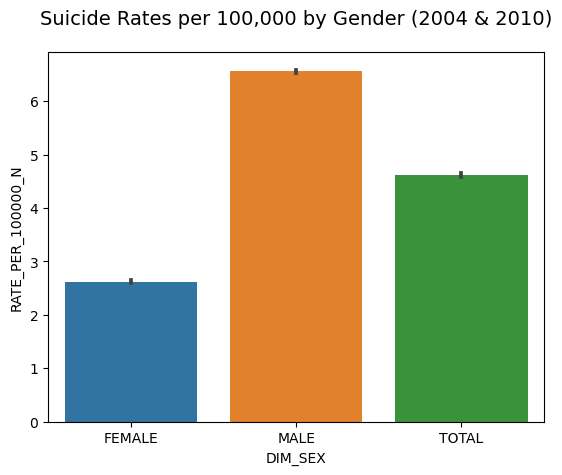

In [17]:
sns.barplot(data=merged_sp1, x="DIM_SEX", y="RATE_PER_100000_N")
plt.title("Suicide Rates per 100,000 by Gender (2004 & 2010)", fontsize=14, pad=20)
plt.show()

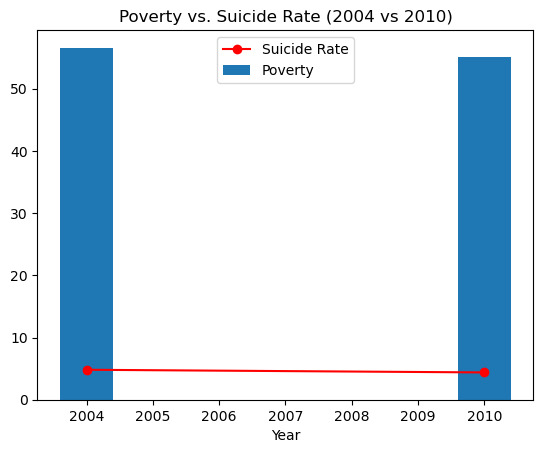

In [18]:
summary = merged_sp1.groupby('Date').agg({
    'Value': 'mean',          # Poverty metric
    'RATE_PER_100000_N': 'mean'  # Suicide rate
}).reset_index()


plt.bar(summary['Date'], summary['Value'], label='Poverty')
plt.plot(summary['Date'], summary['RATE_PER_100000_N'], color='red', marker='o', label='Suicide Rate')
plt.xlabel('Year')
plt.legend()
plt.title('Poverty vs. Suicide Rate (2004 vs 2010)')
plt.show()

In [ ]:
## Scatter Plot

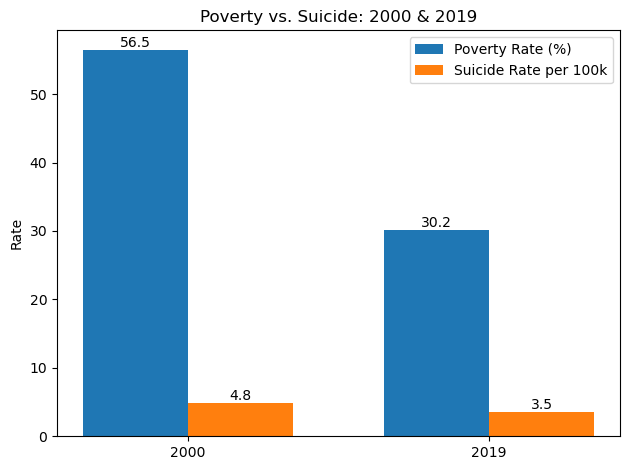

In [28]:
# 1. Load & filter national TOTAL data
df = pd.read_csv('../data/nigerian_suicide_poverty-merged.csv')


df = df[(df.GEO_NAME_SHORT == 'Nigeria') & (df.DIM_SEX == 'TOTAL')]

# 2. Pick earliest & latest years
years = sorted(df.DIM_TIME.unique())
y1, y2 = years[0], years[-1]

# 3. Extract the two metrics
data = df.set_index('DIM_TIME')
pov = data.loc[[y1, y2], 'Value']
sui = data.loc[[y1, y2], 'RATE_PER_100000_N']

# ————————————————————————————————————————

# 4b. Side-by-side bar chart
x = [0, 1]; w = 0.35
plt.bar([i - w/2 for i in x], pov.values, w, label='Poverty Rate (%)')
plt.bar([i + w/2 for i in x], sui.values, w, label='Suicide Rate per 100k')
for i, yr in enumerate((y1, y2)):
    plt.text(x[i] - w/2, pov.loc[yr],  f"{pov.loc[yr]:.1f}", ha='center', va='bottom')
    plt.text(x[i] + w/2, sui.loc[yr], f"{sui.loc[yr]:.1f}", ha='center', va='bottom')
plt.xticks(x, [y1, y2])
plt.title(f'Poverty vs. Suicide: {y1} & {y2}')
plt.ylabel('Rate')
plt.legend()
plt.tight_layout()
plt.show()

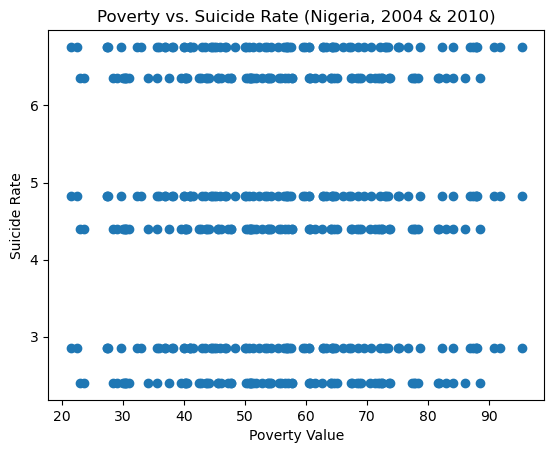

In [19]:
plt.scatter(merged_sp1['Value'], merged_sp1['RATE_PER_100000_N'])
plt.xlabel('Poverty Value')
plt.ylabel('Suicide Rate')
plt.title('Poverty vs. Suicide Rate (Nigeria, 2004 & 2010)')
plt.show()